In [1]:
# External Imports
import folium
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
import shapely
from shapely.geometry import Polygon,Point

# Core Imports
import json
import os.path as path
import sys
from collections import namedtuple

# Internal Imports
sys.path.append("/driptorch")
import driptorch as dt
from driptorch.firing import flank



# Define burn unit spatial data in GeoJSON format
geojson_1 = json.loads('{"type": "FeatureCollection", "features": [{"id": "8", "type": "Feature", "properties": {"Acres": 84, "FACTSsize": 83.951, "FY_Schedul": "FY23", "Project_Na": "Mountain Top RX", "Treatment": "RX", "Type_Thinn": null, "Unit_Name": "Inspiration", "Unit_No": 9}, "geometry": {"type": "Polygon", "coordinates": [[[-110.7558113510971, 32.42810001039591, 0.0], [-110.7557335453154, 32.42835387672473, 0.0], [-110.75566047455358, 32.42836702299154, 0.0], [-110.75562599721297, 32.42848286140046, 0.0], [-110.75560849713291, 32.42863736570989, 0.0], [-110.75560830489343, 32.4287088396631, 0.0], [-110.75560817194277, 32.428758075405796, 0.0], [-110.7556081198405, 32.428777415601566, 0.0], [-110.75566676365888, 32.42890423871676, 0.0], [-110.75569551064626, 32.4289870851369, 0.0], [-110.7556918392317, 32.429010788132544, 0.0], [-110.75568620769319, 32.42904713837515, 0.0], [-110.75568601545372, 32.429048388694035, 0.0], [-110.75564066220996, 32.42911934066066, 0.0], [-110.75559674537237, 32.42928558653502, 0.0], [-110.75554739282897, 32.42942395746727, 0.0], [-110.75551906265986, 32.429550499888514, 0.0], [-110.75554181518936, 32.42976220042115, 0.0], [-110.7556001086648, 32.4298844637238, 0.0], [-110.75563343256857, 32.42995436186377, 0.0], [-110.75564270318229, 32.42997380567921, 0.0], [-110.75577651173546, 32.430083994044836, 0.0], [-110.7558517591152, 32.43018961021562, 0.0], [-110.75587962575365, 32.43022956303809, 0.0], [-110.75591147642035, 32.43031122162969, 0.0], [-110.75592883726152, 32.43045049174969, 0.0], [-110.75593948229766, 32.43073780236836, 0.0], [-110.75599382228751, 32.43085844707932, 0.0], [-110.75611361173232, 32.43103485433625, 0.0], [-110.75626983055689, 32.43121751117592, 0.0], [-110.75637152344031, 32.43134752064577, 0.0], [-110.7565278922835, 32.431474544862816, 0.0], [-110.7566444019792, 32.43155971358563, 0.0], [-110.75688051876175, 32.4318028476352, 0.0], [-110.75696747927451, 32.43199155262757, 0.0], [-110.75702535772825, 32.43241250412081, 0.0], [-110.7570864907783, 32.43261707011038, 0.0], [-110.75716937114305, 32.43281099661748, 0.0], [-110.75729396837126, 32.43299917786161, 0.0], [-110.75729641268717, 32.43300286951459, 0.0], [-110.75730392709451, 32.43301469811866, 0.0], [-110.75734359220588, 32.433077139262586, 0.0], [-110.75733613798566, 32.433138939689194, 0.0], [-110.75729577578161, 32.433240857606116, 0.0], [-110.75722614107575, 32.43338598933373, 0.0], [-110.75721119310941, 32.433413555677, 0.0], [-110.75720922669724, 32.43341718059214, 0.0], [-110.75716754037647, 32.4334940536274, 0.0], [-110.75716187739694, 32.4335083508371, 0.0], [-110.7562883062073, 32.43385351134338, 0.0], [-110.75562710663233, 32.43405576917699, 0.0], [-110.75465254594016, 32.43453314029489, 0.0], [-110.75405354661378, 32.435303150873615, 0.0], [-110.75328965433046, 32.435610330645616, 0.0], [-110.7524146233785, 32.43560207337899, 0.0], [-110.75231674923336, 32.435604604161945, 0.0], [-110.7522757438356, 32.43508632669509, 0.0], [-110.75248033693813, 32.43459142403397, 0.0], [-110.75247791957172, 32.43458487030905, 0.0], [-110.75245751523838, 32.43456681799398, 0.0], [-110.75242164101752, 32.43448594418446, 0.0], [-110.75238960619615, 32.43434552937377, 0.0], [-110.75238582069555, 32.43432893803163, 0.0], [-110.75232938134286, 32.434182020778906, 0.0], [-110.75232888008296, 32.434180950221084, 0.0], [-110.75228070343425, 32.43407811899417, 0.0], [-110.75225272899799, 32.43402996733035, 0.0], [-110.75222876104789, 32.43398871059382, 0.0], [-110.75220470326626, 32.43395060941398, 0.0], [-110.7521171435772, 32.43384635859613, 0.0], [-110.75199340603672, 32.4337442283125, 0.0], [-110.75186710560271, 32.43363442123986, 0.0], [-110.75178725076385, 32.43354661748931, 0.0], [-110.75172421777698, 32.43344898824947, 0.0], [-110.7516186827991, 32.433304164449495, 0.0], [-110.75151310021046, 32.433176870618354, 0.0], [-110.75138735044376, 32.433083371622594, 0.0], [-110.7513054977517, 32.43303732341873, 0.0], [-110.75116360615765, 32.432960352186875, 0.0], [-110.75110883407812, 32.432939663299656, 0.0], [-110.7510949919379, 32.43293443402287, 0.0], [-110.75106428572488, 32.43290537843592, 0.0], [-110.75068253945837, 32.43271380633581, 0.0], [-110.75056452777949, 32.43264339930906, 0.0], [-110.75053167818618, 32.432614692399746, 0.0], [-110.75049717299778, 32.43257380804942, 0.0], [-110.75047732831486, 32.43252791046701, 0.0], [-110.75047535202124, 32.43248416387369, 0.0], [-110.75047404856576, 32.432445797446334, 0.0], [-110.75047734628117, 32.4323440522588, 0.0], [-110.75047608594483, 32.432284594129534, 0.0], [-110.75047296250258, 32.43222635439141, 0.0], [-110.75046923898574, 32.432156928856195, 0.0], [-110.75047696090388, 32.43209466676915, 0.0], [-110.75050807225713, 32.432039831999916, 0.0], [-110.75055750834386, 32.43197309718693, 0.0], [-110.75058584659782, 32.43191976510481, 0.0], [-110.7505986413024, 32.43185503034769, 0.0], [-110.75058755160023, 32.43179414343689, 0.0], [-110.75054873809175, 32.43171418305355, 0.0], [-110.75050839834557, 32.43165178039253, 0.0], [-110.75045007432745, 32.43158626145677, 0.0], [-110.75037138640015, 32.43152695901858, 0.0], [-110.7522157435611, 32.42946759029503, 0.0], [-110.7532297187347, 32.42848324734121, 0.0], [-110.75340277558092, 32.42816342245212, 0.0], [-110.75363189538571, 32.4279398130744, 0.0], [-110.75407969926664, 32.42721880028716, 0.0], [-110.75412635416926, 32.42713506130516, 0.0], [-110.75414726425412, 32.42709753197921, 0.0], [-110.75418551272226, 32.42711965301465, 0.0], [-110.75424375948529, 32.42715341233996, 0.0], [-110.75429972183252, 32.427169354428756, 0.0], [-110.75436030241866, 32.427203119043064, 0.0], [-110.75440694654147, 32.42721310511681, 0.0], [-110.7544395841324, 32.42722504366747, 0.0], [-110.75445817746215, 32.42725278780668, 0.0], [-110.75450242398148, 32.427286520543575, 0.0], [-110.75452338796524, 32.42730041535213, 0.0], [-110.75457230662238, 32.42733217663952, 0.0], [-110.7546445832735, 32.42735606735602, 0.0], [-110.75468890435299, 32.427362091594674, 0.0], [-110.75474721130313, 32.42737407941138, 0.0], [-110.754786800956, 32.4274038442207, 0.0], [-110.75485211386705, 32.427413866667834, 0.0], [-110.75490577473056, 32.42741792932991, 0.0], [-110.75495464577695, 32.427467503953224, 0.0], [-110.75501519582036, 32.42751314175968, 0.0], [-110.75505941539024, 32.427556769446035, 0.0], [-110.75512913992766, 32.427614015871775, 0.0], [-110.75518747742052, 32.427661913918186, 0.0], [-110.75529231710236, 32.42772545063377, 0.0], [-110.75536694913616, 32.42774142825866, 0.0], [-110.75544623623975, 32.42776137374745, 0.0], [-110.75554413913102, 32.42780114718474, 0.0], [-110.75565832847833, 32.427858763475825, 0.0], [-110.75569785614749, 32.4279122784202, 0.0], [-110.75576764985519, 32.42799157947523, 0.0], [-110.7557978314521, 32.42804903338194, 0.0], [-110.7558113510971, 32.42810001039591, 0.0]]]}}]}')


/Users/franklyndunbar/Project/Silvx/DripTorch/driptorch/firing/flank.py


In [2]:
blue_mountain = [ [ -114.115414416057106, 46.84141805647527 ], [ -114.115414291632106, 46.841120501959843 ], [ -114.115029536394999, 46.840770983423162 ], [ -114.114665457279102, 46.840548989245221 ], [ -114.114413512744093, 46.840076418364873 ], [ -114.114525405809005, 46.839461779184177 ], [ -114.114333139108197, 46.839058605593813 ], [ -114.113953012275601, 46.838563152635771 ], [ -114.113451259100998, 46.837883698065788 ], [ -114.113224837669506, 46.837587544981723 ], [ -114.112789079409595, 46.836901298964847 ], [ -114.112930132494895, 46.836593931018783 ], [ -114.115362037381402, 46.835906544594543 ], [ -114.115155840059799, 46.835699418591219 ], [ -114.114651512340302, 46.835676739527457 ], [ -114.113836748826202, 46.835695352398247 ], [ -114.113174153126593, 46.835779624664482 ], [ -114.112181587364802, 46.835899281750358 ], [ -114.111299220479907, 46.83588420728352 ], [ -114.110869729217498, 46.835757931029612 ], [ -114.110161683708398, 46.835556727734392 ], [ -114.109653672339604, 46.835491082423658 ], [ -114.108349803286202, 46.835471042038172 ], [ -114.107654022255502, 46.835554206149077 ], [ -114.107000851808294, 46.835709468827467 ], [ -114.106305895096099, 46.835728357206087 ], [ -114.105282095585196, 46.835833565874623 ], [ -114.1055753992798, 46.836516386443613 ], [ -114.105737911069895, 46.836894711956553 ], [ -114.106538569463297, 46.837331382367509 ], [ -114.1071623129843, 46.837737434373651 ], [ -114.107713413292899, 46.838129136519498 ], [ -114.107982567263093, 46.838551148632902 ], [ -114.108502357207598, 46.839075937037279 ], [ -114.108969268362799, 46.839671473567421 ], [ -114.109297059793505, 46.840260548147413 ], [ -114.109857244406001, 46.841438219047838 ], [ -114.115414416057106, 46.84141805647527 ] ] 

In [3]:
blue_mountain = Polygon([Point(p) for p in blue_mountain])

In [4]:

burn_unit = dt.BurnUnit(blue_mountain, firing_direction=0)
bounds = burn_unit.bounds
firing_area = burn_unit.buffer_control_line(5)
firing_area = firing_area.buffer_downwind(20)
blackline_area = burn_unit.difference(firing_area)
dash_igniter = dt.Igniter(5,dash_length=.5)
point_crew = dt.IgnitionCrew.clone_igniter(dash_igniter, 5)


32611


/Users/franklyndunbar/Project/Silvx/DripTorch/driptorch/personnel.py:56: IgniterWarning: Igniter velocity is above reasonable rates
  warnings.warn(IgniterWarning(IgniterWarning.velocity_warning))


In [5]:
igniter_spacing = 5
heat_spacing = 10
technique = dt.firing.Strip(firing_area, point_crew)

pattern = technique.generate_pattern(spacing=igniter_spacing,depth=5,heat_depth=heat_spacing)
map = dt.Map(burn_unit)
map.add_firing_area(firing_area)
map.add_blackline_area(blackline_area)
map.add_pattern(pattern)
map.show()


In [6]:
bounds

array([[ 719944.43692996, 5190939.72127086],
       [ 720739.85350448, 5190939.72127086],
       [ 720739.85350448, 5191599.96139103],
       [ 719944.43692996, 5191599.96139103]])

In [7]:
bm_dem = np.squeeze(np.load("/Users/franklyndunbar/Project/bluemountain_dem_array.npy"))
bm_dem_transform =  np.load("/Users/franklyndunbar/Project/bluemountain_dem_transform.npy")
import pdb
def index(location,round=True) -> np.ndarray:
    # Map from spatial coordinates to pesudo raster
    #append 1
    point = [location[0],location[1],1]
    index = bm_dem_transform@point
    index = index[:-1]
    if round:
        index = index.astype(int)
    return index

def sampleDEM(location) -> float:
  
    ind = index(location)
    return bm_dem[ind[0],ind[1]]

def getRes(transform:np.ndarray) -> np.ndarray:
    world2ind = transform.copy()
    ind2world = np.linalg.inv(transform)
    origin = np.array([0,0,1])
    dx = np.array([1,0,1])
    dy = np.array([0,1,1])
    
    origin_world = ind2world@origin
    dx_world = ind2world@dx
    dy_world = ind2world@dy
    
    dx_res = np.abs(origin_world - dx_world)[0]
    dy_res = np.abs(origin_world - dy_world)[1]
    return (dx_res,dy_res)
    
print(getRes(bm_dem_transform))
delta_dem = getRes(bm_dem_transform)[0]

(8.845080059487373, 8.845080056227744)


In [8]:

raw_paths = technique.raw_paths(paths=dt.Pattern.empty_path_dict(),spacing=5,depth=5,heat_depth=10,side='left')
raw_paths.keys()

dict_keys(['heat', 'igniter', 'leg', 'geometry'])

In [9]:
import pdb
import matplotlib.pyplot as plt
def get_arc(start,end,spacing,plot=False):
    # Get the local arc points from r,theta and real world coords along arc

    dpos = end - start
    r = np.linalg.norm((dpos))
    theta = np.arctan(dpos[1]/dpos[0])
    local_theta_start = np.arcsin((spacing/2*r)%1)
    theta_range = np.linspace(-1*local_theta_start,local_theta_start,10) + theta
    
    # put span of angles back into igniter frame of ref
    
    x_y_global = np.asarray([[r*np.cos(x),r*np.sin(x)] + start for x in theta_range.tolist()])
    
 
    return theta_range, x_y_global


In [10]:
from shapely.ops import unary_union
from shapely.geometry import LineString,Point
import matplotlib.pyplot as plt
import time

igniter_spacing = 5
var_dem = 2
var_path = igniter_spacing/2
posteriors = {}
augmented_paths = {}
original_paths = {}

delta_distance = delta_dem - .1

igniters = np.unique(raw_paths["igniter"]).shape[0]
start = time.time()
for heat in np.unique(raw_paths["heat"]):
 
    for igniter in np.unique(raw_paths["igniter"]):
        pointindex = heat*igniters + igniter
        try:
            geometry = raw_paths["geometry"][pointindex]
            distances = np.arange(0,geometry.length,delta_distance)  
            points = [geometry.interpolate(distance).coords[0] for distance in distances.tolist()] + [geometry.boundary[1]]
            points = np.array([np.asarray(p) for p in points])
            original_paths[heat,igniter] = points

            for i in range(points.shape[0]-1):

                start = points[i,:]
                stop = points[i+1,:]
                dpos = stop - start
                r = np.linalg.norm((dpos))
                prior_mean = np.arctan(dpos[1]/dpos[0])
                prior_var = np.sqrt(np.deg2rad(10))

                thetas,arc_points = get_arc(start,stop,igniter_spacing)
                sampled_elevs = [sampleDEM(x) for x in arc_points]
                start_elev = sampleDEM(start)
                delta_elv = [np.abs(x - start_elev) + 1e-2 for x in sampled_elevs]
                weights = [(1/x) for x in delta_elv] # Generate weights by their inverse of change in elevation
                weights /= np.sum(weights)
                lh_mean = thetas@weights
                lh_var = (delta_elv - lh_mean)**2
                lh_var = lh_var@weights


                # Compute posterior
                # https://stats.stackexchange.com/questions/538622/product-of-two-normal-distributions-for-bayes-rule-is-not-product-of-normal-ou

                post_mean = (lh_mean*lh_var + prior_mean*prior_var)/(prior_var + lh_var)
                post_var = 1 / (1/lh_var + 1/prior_var)

                new_stop = dpos - r*np.array([np.cos(post_mean),np.sin(post_mean)]) 

                points[i+1:,:] += new_stop



            augmented_paths[heat,igniter] = points
        except:
            break

end = time.time() - start
print(end)



[1.66774069e+09 1.66327047e+09]


In [11]:
dpath = augmented_paths[0,0][-1] - augmented_paths[0,0][0]
angle = np.rad2deg(np.arctan(dpath[1]/dpath[0]))

print(dpath)
print(angle)


[643.88446853  62.07988004]
5.507128879805206


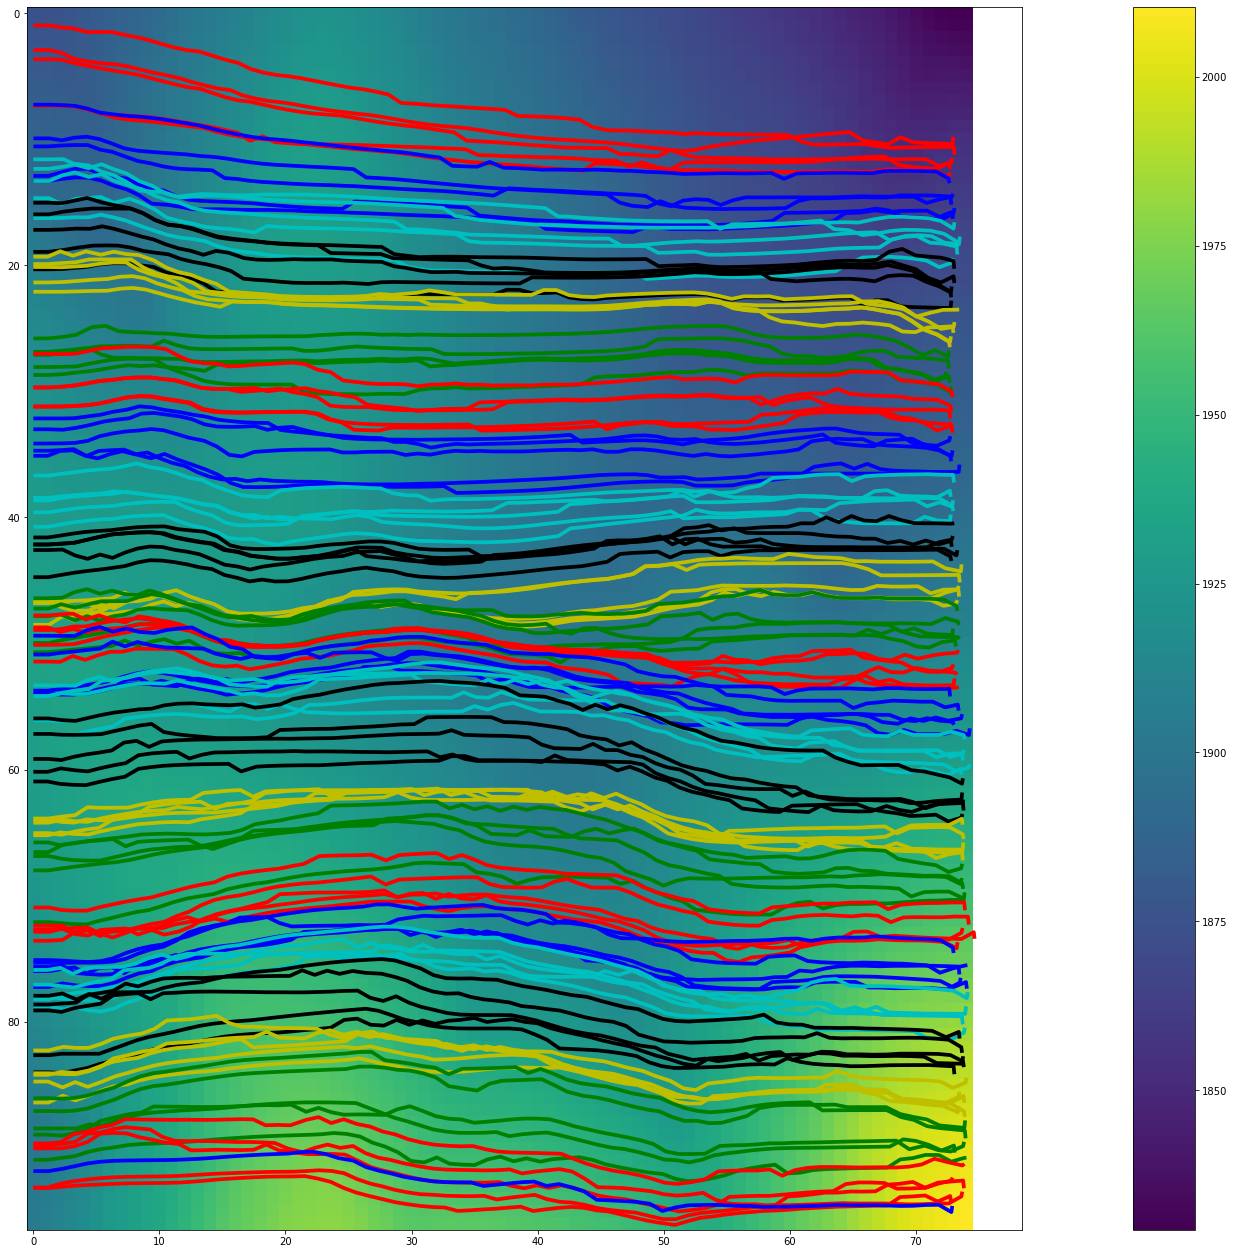

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (160/4,90/4)
colors = ["r","b","c","k","y","g"]
all_points = []
for (h,i) in augmented_paths.keys():
  
        
    path = augmented_paths[h,i]
    all_points.extend(path.tolist())

all_points = np.asarray([index(p) for p in all_points])
minx,maxx,miny,maxy = np.min(all_points[:,0]),np.max(all_points[:,0]),np.min(all_points[:,1]),np.max(all_points[:,1])
dem_obs = bm_dem[minx:maxx+1,miny:maxy+1]

plt.imshow(dem_obs.T)
for (h,i) in augmented_paths.keys():
  
    path = augmented_paths[h,i].copy()
    path = np.asarray([index(p,round=False) - (minx,miny) for p in path.tolist()])

    #path = np.array([index(p) for p in path.tolist()])
    plt.plot(path[::-1,0],path[:,1],c=colors[h%len(colors)],linewidth=15/4,label=f"{i}")
    #plt.scatter(path[0,1],path[0,0],c='b',linewidth=15)
    #plt.scatter(path[-1,1],path[-1,0],c='k',linewidth=15)

        
plt.colorbar()
plt.show()



In [13]:
aggregate_paths = {}
for heat,igniter in list(original_paths.keys()):
    try:
        aggregate_paths[heat].append(augmented_paths[heat,igniter])
    except:
        aggregate_paths[heat] = [augmented_paths[heat,igniter]]
    

In [14]:
import sklearn
from sklearn.metrics.pairwise import pairwise_distances as kernelmat
from sklearn.metrics.pairwise import rbf_kernel as rbf


def rbf(X,gamma=.25,l = 1):
    
    return np.exp((-gamma*X**2)/(l**2))

In [15]:

l = 17
gamma = .001
heattrend = {}

for heat in aggregate_paths.keys():
    
    aggregate_paths[heat] = np.stack(aggregate_paths[heat])
    xmin = np.min(aggregate_paths[heat][:,:,0])
    ymin = np.max(aggregate_paths[heat][:,:,1])
    xmax = np.max(aggregate_paths[heat][:,:,0])

    origin = [[[xmin,ymin]]]
   
    aggregate_paths[heat] -= origin
    observed = []
    for igniter in range(aggregate_paths[heat].shape[0]):
        obs = aggregate_paths[heat][igniter,:,:] - aggregate_paths[heat][igniter,0,:]
        observed.extend(obs.tolist())
    observed = np.asarray(observed)


    X_obs = observed[:,0].reshape(-1,1)
    Y_obs = observed[:,1].reshape(-1,1)
    X_pred = np.arange(0,xmax-xmin,25).reshape(-1,1)
    K = kernelmat(X_obs)
    K += .15*np.eye(K.shape[0])
    K_s = kernelmat(X_pred,X_obs) 
    K_ss = kernelmat(X_pred) 

    K = rbf(K,gamma,l)
    K_s = rbf(K_s,gamma,l)
    K_ss = rbf(K_ss,gamma,l)


    K_inv = np.linalg.inv(K)

    pred = K_s@K_inv@Y_obs
#     plt.plot(X_pred[::-1],pred[::-1])
#     plt.scatter(X_obs[::-1],Y_obs[::-1],c='r')
#     plt.show()
    trend_line = np.hstack((X_pred,pred))
    heattrend[heat] = trend_line

    

    

list index out of range
list index out of range
list index out of range
list index out of range


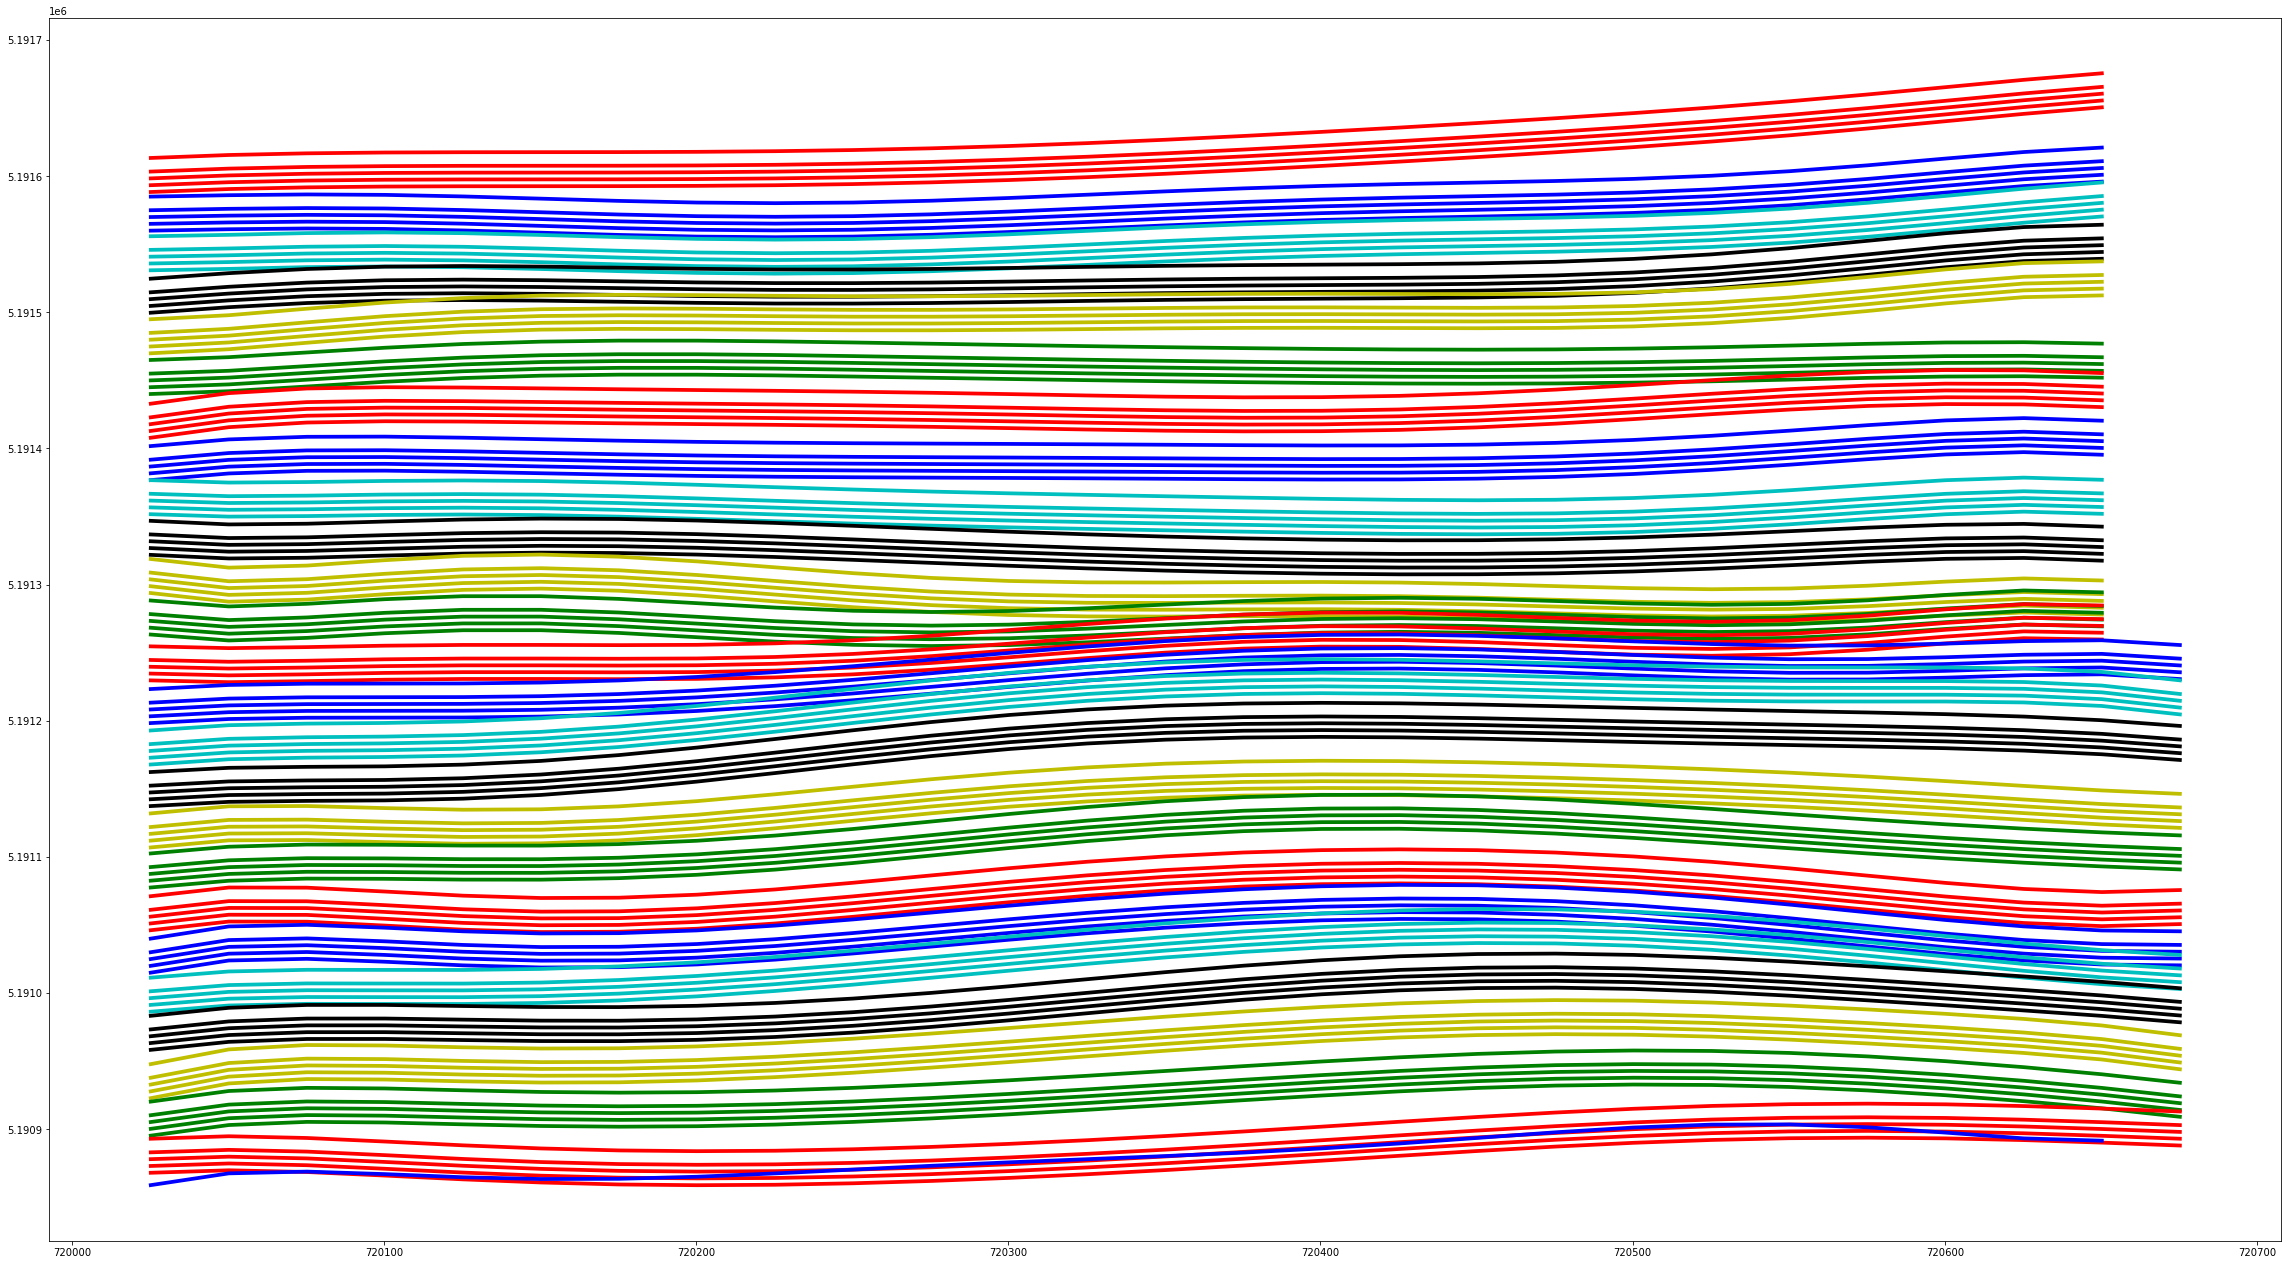

<Figure size 2880x1620 with 0 Axes>

In [16]:
igniters = np.unique(raw_paths["igniter"]).shape[0]
adjusted_paths = []

heats = []
for heat in np.unique(raw_paths["heat"]):
    trendline = heattrend[heat]
    pathset = []
    for igniter in np.unique(raw_paths["igniter"]):
        pointindex = heat*igniters + igniter
        try:
            geometry = raw_paths["geometry"][pointindex]
       
            adjusted_path = trendline + geometry.boundary[0]
            pathset.append(adjusted_path)
            
            plt.plot(adjusted_path[:,0],adjusted_path[:,1],c=colors[heat%len(colors)],linewidth=15/4,label=f"{pointindex}")
        except Exception as e:
            print(e)
    heats.append(np.stack(pathset))

plt.show()
plt.clf()
        

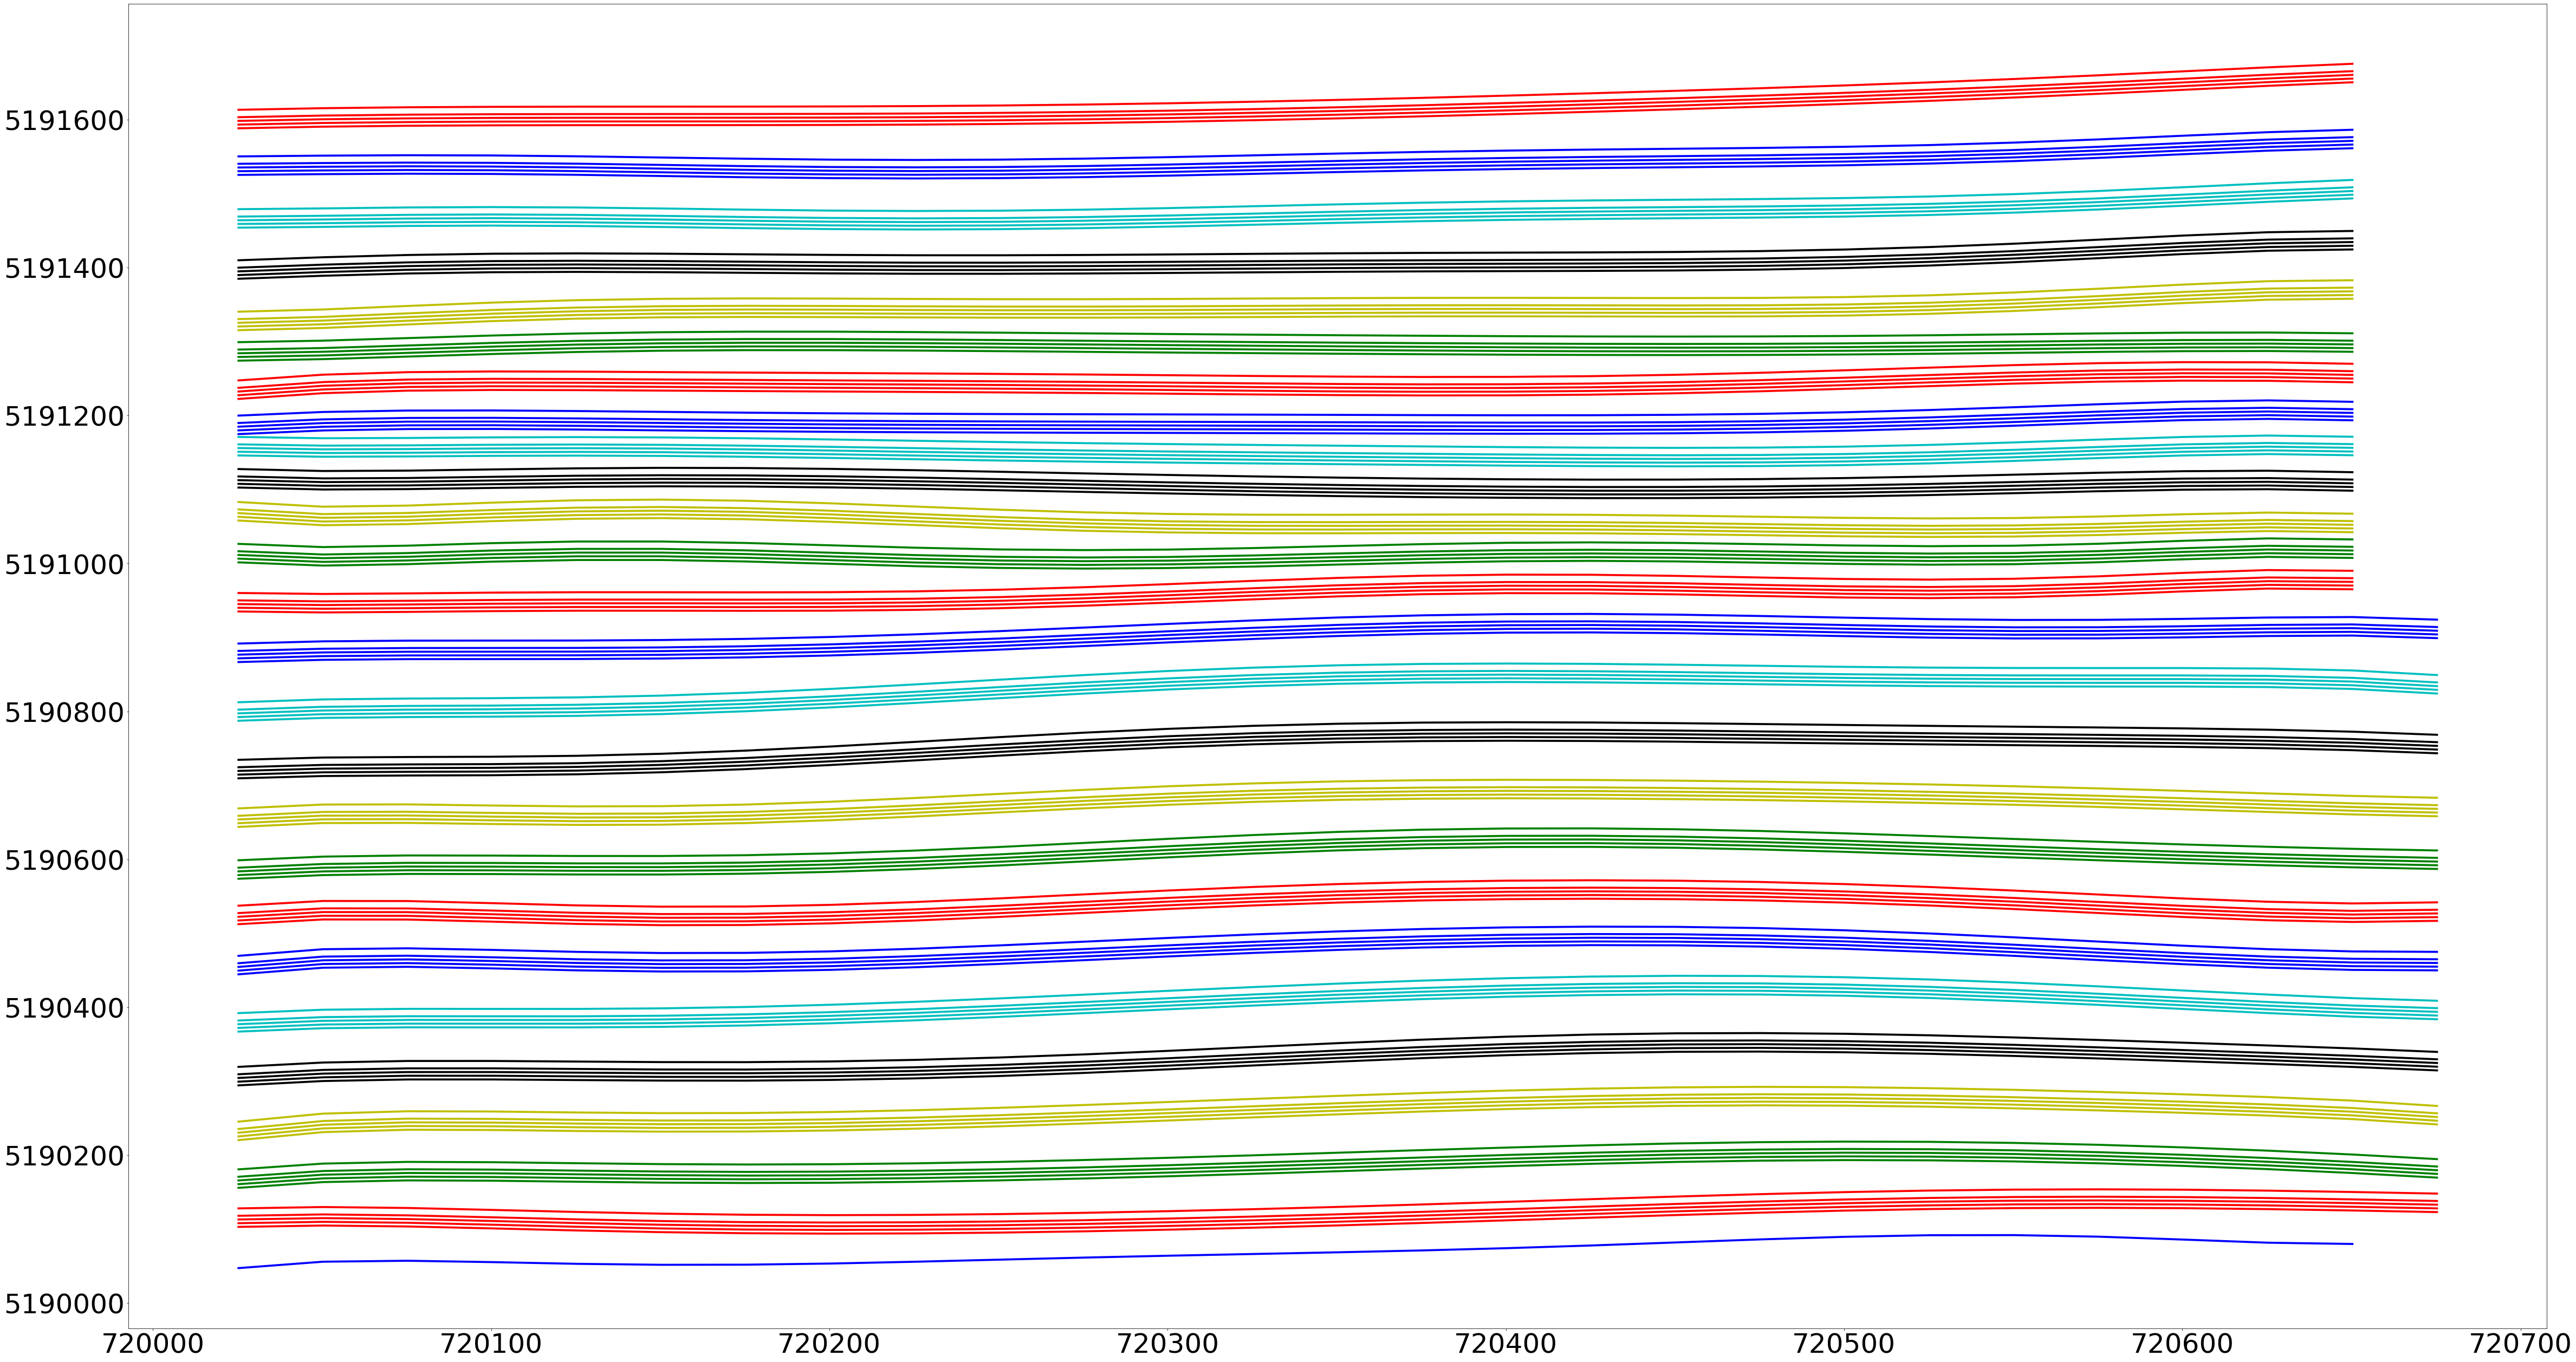

In [17]:
plt.rcParams["figure.figsize"] = (160/2,90/2)
heat_spacing = 2
for i, heat in enumerate(heats):
    if i > 0:
        # get minimum distance between y values of heats
        dydh = np.min(heats[i-1][:,:,1]) - np.max(heat[:,:,1])
      
        if dydh < heat_spacing:
            adjustment = dydh - heat_spacing
        else:
            adjustment = dydh + heat_spacing
        heat[:,:,1] += adjustment
        
    for j in range(heat.shape[0]):
        plt.plot(heat[j,:,0],heat[j,:,1],c=colors[i%len(colors)],linewidth=15/4)

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.ticklabel_format(style='plain')
plt.show()
    

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage.draw import bezier_curve
from scipy.ndimage import distance_transform_edt
from cost_distance import cost_distance_analysis_numpy as cda

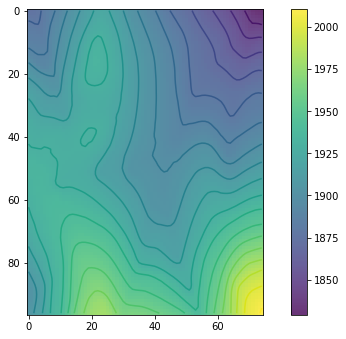

In [87]:
plt.rcParams["figure.figsize"] = (160/16,90/16)
#plt.imshow(dem_obs.T)
#plt.hlines(10,0,dem_obs.shape[0],colors='r')
#plt.scatter(np.linspace(0,dem_obs.shape[1],1),70*np.ones_like(dem_obs[:,0]))
hold_line = np.asarray([index(x) - (minx,miny) for x in np.asarray(raw_paths["geometry"][0]).tolist()])
hold_line_interp = np.vstack((np.linspace(hold_line[0,1],hold_line[1,1],72),np.linspace(hold_line[0,0],hold_line[1,0],72))).T.astype(np.int8)
#plt.plot(hold_line[:,0],hold_line[:,1],c='r')
#dem_obs.T[dem_obs.T%1000 == 0] = 100
countours = np.zeros_like(dem_obs.T,dtype=bool)
countours[dem_obs.T.astype(int) % 20 == 0] = True
countours = ~countours

x = np.arange(dem_obs.T.shape[1])
y = np.arange(dem_obs.T.shape[0])
X,Y = np.meshgrid(x,y)
Z = dem_obs.T
levels = np.arange(np.min(Z),np.max(Z),10)

plt.contour(X,Y,Z,levels=levels)
plt.imshow(dem_obs.T,alpha=0.8)
plt.colorbar()
plt.show()



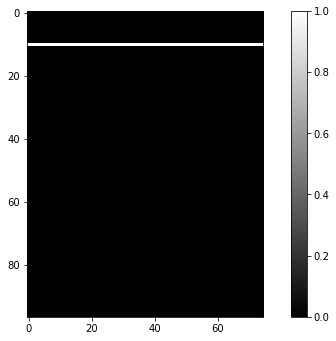

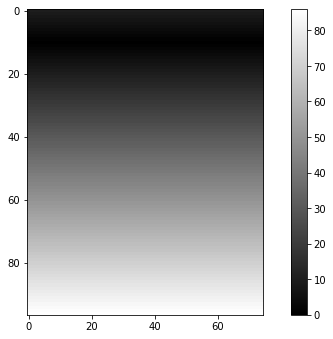

In [20]:
binary_image = np.zeros_like(dem_obs.T)
binary_image[10,:] = 1
binary_image = binary_image.astype(bool)

plt.imshow(binary_image,cmap=plt.cm.gray)
plt.colorbar()
plt.show()

distance_map = distance_transform_edt(~binary_image)
distance_map = np.round(distance_map, 0).astype(int)
plt.imshow(distance_map, cmap=plt.cm.gray)
plt.colorbar()
#plt.plot(hold_line_interp[:,1],hold_line_interp[:,0],c='r')
plt.show()

In [91]:
np.save("/Users/franklyndunbar/Project/testarea",dem_obs.T)

In [95]:
raw_paths["geometry"][1].bounds


(720025.2939476566, 5191604.494835476, 720655.3581162505, 5191604.494835476)